In [1]:
import os
import numpy as np
from df_collector import df_collector
from pathlib import Path
df_collector.root = Path().resolve().parent.parent

In [2]:
def resample_data(data,dec,div):
    dataset = data.copy()
    dataset['round_spot'] = np.round(div*dataset['spot_price'],dec)//div
    dataset[['calculation_date','date']] = dataset[['calculation_date','date']].astype('datetime64[ns]')
    subset = ['round_spot','days_to_maturity', 'updown','outin', 'w', 'barrier_type_name', 'rebate','date','theta','kappa','rho','eta','v0','dividend_rate','risk_free_rate']
    return dataset.sort_values(by='calculation_date',ascending=False).drop_duplicates(subset=subset,keep='first')

In [4]:
data = df_collector.cboe_spx_barriers().iloc[:,1:]

In [5]:
dataset = resample_data(data,-1,2)

In [6]:
S = dataset[['calculation_date','spot_price']].set_index('calculation_date').sort_index().drop_duplicates().squeeze().copy()
S

calculation_date
2022-01-26 14:39:54.042    4424.00
2022-01-26 14:40:00.664    4426.25
2022-01-26 14:40:10.267    4425.75
2022-01-26 14:41:15.158    4422.75
2022-01-26 14:41:26.097    4423.75
                            ...   
2024-10-15 14:04:03.903    5833.00
2024-10-15 14:26:15.994    5828.00
2024-10-15 14:31:59.764    5825.50
2024-10-15 15:57:40.633    5810.00
2024-10-15 16:50:04.131    5813.50
Name: spot_price, Length: 5940, dtype: float64

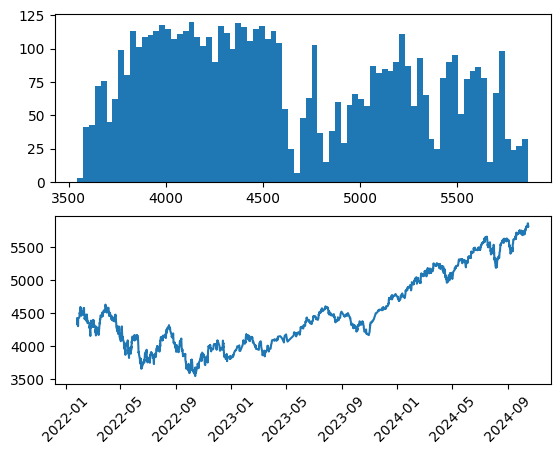

In [7]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,sharex=False)
axs[0].hist(S,bins=int(len(S)**0.5))
axs[1].plot(S)
axs[1].tick_params(axis='x', rotation=45)
plt.show()

In [8]:
data.shape[0]

27725760

In [9]:
dataset.shape[0]

616080